## Intro to scikit learn
this notebook covers  some of the most useful functions of the scikit library

whats going to be covered:


0. workflow of scikit learn
1. getting the data ready
2. choose right estimator/algorithm for our problems
3. fit the model/algo and use it to make predictions on the data
4. evaluating a model
5. improve a model
6. Save and load a trained model
7. Putting it all together

## 0 an end end to scikit workflow

In [6]:
#1 Getting the Data Ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
hd=pd.read_csv("heart-disease (1).csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
## Create X which is called feature matrix,data
X=hd.drop("target",axis=1)
## create Y which is called the labels 
Y=hd["target"]

In [4]:
##2 Choose the right the model and hyper parameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Getting Data Ready

## 3 main things 
1. Split into feature,label column usually X and y
2. Filling aka imputing or disregarding missing values
3. Convert non numerical values to numerical values

In [7]:
hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
X=hd.drop("target",axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [9]:
y=hd["target"]

In [10]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [11]:
##splitting into training and test sets
from sklearn.model_selection import train_test_split
## returns 4 values 
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [12]:
Xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
274,47,1,0,110,275,0,0,118,1,1.0,1,1,2
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,39,1,0,118,219,0,1,140,0,1.2,1,0,3
209,59,1,0,140,177,0,1,162,1,0.0,2,1,3
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [13]:
Xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
199,65,1,0,110,248,0,0,158,0,0.6,2,2,1
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
87,46,1,1,101,197,1,1,156,0,0.0,2,0,3
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3


In [15]:
#1.1 Making sure all data is all numerical
carsales=pd.read_csv("car-sales-extended.csv")
carsales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [17]:
carsales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [19]:
## Split into x and y 
X=carsales.drop("Price",axis=1)
y=carsales["Price"]
Xtest,Xtrain,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [20]:
## build a machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

ValueError: could not convert string to float: 'Toyota'

In [27]:
## convert strings into number int
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catFeatures=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,catFeatures)],remainder="passthrough")
transformedX=transformer.fit_transform(X)
transformedX
pd.DataFrame(transformedX)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [26]:
dummies=pd.get_dummies(carsales[["Make","Doors","Colour"]],dtype="int")
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [31]:
np.random.seed(42)
Xtrain,Xtest,ytrain,ytest=train_test_split(transformedX,y,test_size=0.2)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)


0.3235867221569877

In [33]:
##gives lower result as it doesnt feed the remaining columns only the 3 we selected i.e Make ,Door,Colour
np.random.seed(40)
Xtrainn,Xtestt,ytrainn,ytestt=train_test_split(dummies,y,test_size=0.2)
model.fit(Xtrainn,ytrainn)
model.score(Xtestt,ytestt)

0.13627023446779662

In [35]:
carsalesmissing=pd.read_csv("car-sales-extended-missing-data.csv")
carsalesmissing.head(20)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [37]:
carsalesmissing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
X=carsalesmissing.drop("Price",axis=1)
y=carsalesmissing["Price"]
## convert strings into number int
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catFeatures=["Make","Colour","Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([("one_hot",one_hot,catFeatures)],remainder="passthrough")
transformedX=transformer.fit_transform(X)
transformedX
pd.DataFrame(transformedX)

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...
...,...
995,<Compressed Sparse Row sparse matrix of dtype ...
996,<Compressed Sparse Row sparse matrix of dtype ...
997,<Compressed Sparse Row sparse matrix of dtype ...
998,<Compressed Sparse Row sparse matrix of dtype ...


In [39]:
np.random.seed(42)
Xtrain,Xtest,ytrain,ytest=train_test_split(transformedX,y,test_size=0.2)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

ValueError: Input y contains NaN.

## MISSING VALUES
We can either fill the missing values or just remove them

In [41]:

carsalesmissing.fillna({"Make":"Missing"},inplace=True)

In [42]:
carsalesmissing.isna().sum()

Make              0
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [43]:
carsalesmissing.fillna({"Colour":"Missing"},inplace=True)

In [45]:
carsalesmissing.fillna({"Odometer (KM)":carsalesmissing["Odometer (KM)"].mean()},inplace=True)

In [46]:
carsalesmissing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors            50
Price            50
dtype: int64

In [47]:
carsalesmissing.fillna({"Doors":4},inplace=True)

In [50]:
carsalesmissing.isna().sum()
##Remove rows with missing price value

carsalesmissing.dropna(inplace=True)

In [51]:
carsalesmissing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [53]:
X=carsalesmissing.drop("Price",axis=1)
y=carsalesmissing["Price"]

In [61]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catFeatures=["Make","Colour","Doors"]
one_hot=OneHotEncoder(sparse_output=False)
transformer=ColumnTransformer([("one_hot",one_hot,catFeatures)],remainder="passthrough")
transformedX=transformer.fit_transform(X)
transformedX
pd.DataFrame(transformedX)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [59]:
np.random.seed(42)
Xtrain,Xtest,ytrain,ytest=train_test_split(transformedX,y,test_size=0.2)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.22233003292603104

In [67]:
carsalesmissing1=pd.read_csv("car-sales-extended-missing-data.csv")
carsalesmissing1

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [69]:
carsalesmissing1.dropna(subset=["Price"], inplace=True)

In [70]:
carsalesmissing1

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [71]:
X=carsalesmissing1.drop("Price",axis=1)
y=carsalesmissing1["Price"]

In [72]:
np.random.seed(42)
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [75]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
catimputer=SimpleImputer(strategy="constant",fill_value="missing")
doorimputer=SimpleImputer(strategy="constant",fill_value=4)
numimputer=SimpleImputer(strategy="mean")
catfeatures=["Make","Colour"]
doorfeatures=["Doors"]
numfeatures=["Odometer (KM)"]
imputer=ColumnTransformer([("catimputer",catimputer,catfeatures),("doorimputer",doorimputer,doorfeatures),("numimputer",numimputer,numfeatures)])
fillx=imputer.fit_transform(X)
fillx

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [78]:
carsalesfilled=pd.DataFrame(fillx,columns=["Make","Colour","Doors","Odometer (KM)"])
carsalesfilled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [79]:
carsalesfilled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [80]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
catFeatures=["Make","Colour","Doors"]
one_hot=OneHotEncoder(sparse_output=False)
transformer=ColumnTransformer([("one_hot",one_hot,catFeatures)],remainder="passthrough")
transformedX=transformer.fit_transform(carsalesfilled)
transformedX
pd.DataFrame(transformedX)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0


In [81]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(transformedX,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.21990196728583944

In [82]:
##imputing is handling missing values
##feature coding is turning categorical data into numerical value

## Choosing the right model/algorithm

* Sklearn refers to machine learning models,algos as estimators
* Classification problem=predicting a category(heart disease or not)
* clf short for classifier
* Regression Problem- Prediciting a number such as selling price of a car

In [83]:
### piciking a machine learnming model for a regression problem
## dataset -> small data that allows u to make some experiments
## we will use caifornia housing dataset

In [11]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
type(housing)

sklearn.utils._bunch.Bunch

In [12]:
housing


{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [14]:
hf=pd.DataFrame(housing["data"],columns=housing["feature_names"])
hf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [17]:
##getting the target column
hf["target"]=housing["target"]
hf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [16]:
hf.drop("MedHouseVal",axis=1,inplace=True)

KeyError: "['MedHouseVal'] not found in axis"

In [ ]:
hf

In [ ]:
##import algorithm
np.random.seed(42)
X=hf.drop("target",axis=1)
y=hf["target"]


Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm
model1=Lasso()
model=Ridge()

model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)
model1.fit(Xtrain,ytrain)
model1.score(Xtest,ytest)


## Ensemble models
ensemble models are combinations of smaller models to try and make better predictions than just a single a model

In [107]:
##import the random forest regressor model from the ensemble module
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
model=RandomForestRegressor()
X=hf.drop("target",axis=1)
y=hf["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.806652667101436

## Picking a machine learning model for classification problem

In [27]:
import pandas as pd
hd=pd.read_csv("heart-disease (1).csv")
hd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [111]:
from sklearn.svm import LinearSVC
np.random.seed(42)
clf=LinearSVC()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
clf.fit(Xtrain,ytrain)
clf.score(Xtest,ytest)


0.8688524590163934

In [112]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
clf.fit(Xtrain,ytrain)
clf.score(Xtest,ytest)

0.819672131147541

In [113]:
## if u have structured data use ensemble methods theyll perform better

## fit the model on our data and use it to make predictions

different names for 
* X : features,feature variables,data
* y : target,target variables,labels

## make predictions using machine learning models

In [117]:
## use trained model to make predictions
clf.predict(np.array([1,2,3,4])) ##wouldnt work as the data isnt of the similar nature

C:\Users\Kapil\Desktop\SampleProj1\SciKitLearn\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [118]:
Xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
231,57,1,0,165,289,1,0,124,0,1.0,1,3,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3


In [119]:
clf.predict(Xtest)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1])

In [120]:
## Compare predictions with truth labels to evaluate model
ypreds=clf.predict(Xtest)
acc=np.mean(ypreds==ytest)
acc


np.float64(0.819672131147541)

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypreds)

0.819672131147541

In [123]:
##predict proba
clf.predict_proba(Xtest[:5])

array([[0.89, 0.11],
       [0.22, 0.78],
       [0.02, 0.98],
       [0.33, 0.67],
       [0.33, 0.67]])

In [124]:
clf.predict(Xtest[:5])

array([0, 1, 1, 1, 1])

In [134]:
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
model=RandomForestRegressor()
X=hf.drop("target",axis=1)
y=hf["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
model.fit(Xtrain,ytrain)
ypreds=model.predict(Xtest)
model.score(Xtest,ytest)
acc=np.mean(ytest==ypreds)
acc

np.float64(0.0)

In [135]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ypreds)

0.32656738464147306

## EVALUATING A MODEL
 Three in built ways to do so:
 
 * Built in score method
 * scoring parameter
 * problem specific metric functions

In [141]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

clf.fit(Xtrain,ytrain)
clf.score(Xtest,ytest)


0.8524590163934426

In [142]:
hf

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [145]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model=RandomForestRegressor()
X=hf.drop("target",axis=1)
y=hf["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.806652667101436

## USING THE SCORING METHOD

In [148]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

clf.fit(Xtrain,ytrain)
clf.score(Xtest,ytest)
          

0.8524590163934426

In [152]:
np.random.seed(42)
np.mean(cross_val_score(clf,X,y,cv=5))

np.float64(0.8248087431693989)

In [ ]:
##default scoring parameter of a classifier is mean accuracy
clf.score(Xtest,ytest)

In [153]:
## scoring paramter set to none by default,takes the scoring method of the estimator
np.random.seed(42)
np.mean(cross_val_score(clf,X,y,cv=5,scoring=None))


np.float64(0.8248087431693989)

## Classification evaluation metrices
1. Accuracy
2. Area Under Roc Curve
3. Confusion Matrix
4. Classification Report


Accuracy

In [8]:
from sklearn.model_selection import cross_val_score
import numpy as np 
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
np.mean(cross_val_score(clf,X,y,cv=5,scoring=None))
print(f"Heart Disease Cross Validated Accuracy {np.mean(cross_val_score(clf,X,y,cv=5))*100:.2f}")

NameError: name 'hd' is not defined

Area Under The ROC Curve

** AREA UNDER CURVE (AUC) OR ROC
ROC curves are a comparison of a models true positive rate versus a models false positive rate
* True positive is when model predicts 1 when truth is 1
* False positive is when model predicts 1 when truth is 0

* True negative is when model predicts 0 when truth is 0
* False negative is when model predicts 0 when truth is 1


In [162]:
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [167]:
np.random.seed(42)
from sklearn.metrics import roc_curve
clf.fit(Xtrain,ytrain)
ypreds=clf.predict_proba(Xtest)
ypreds

array([[0.25, 0.75],
       [0.28, 0.72],
       [0.4 , 0.6 ],
       [0.65, 0.35],
       [0.07, 0.93],
       [0.3 , 0.7 ],
       [0.85, 0.15],
       [0.83, 0.17],
       [0.17, 0.83],
       [0.41, 0.59],
       [0.14, 0.86],
       [0.66, 0.34],
       [0.01, 0.99],
       [0.66, 0.34],
       [0.02, 0.98],
       [0.4 , 0.6 ],
       [0.31, 0.69],
       [0.86, 0.14],
       [0.67, 0.33],
       [0.52, 0.48],
       [0.22, 0.78],
       [0.2 , 0.8 ],
       [0.88, 0.12],
       [0.15, 0.85],
       [0.24, 0.76],
       [0.56, 0.44],
       [0.94, 0.06],
       [0.89, 0.11],
       [0.31, 0.69],
       [0.  , 1.  ],
       [0.24, 0.76],
       [0.31, 0.69],
       [0.23, 0.77],
       [0.94, 0.06],
       [0.7 , 0.3 ],
       [0.35, 0.65],
       [0.08, 0.92],
       [0.24, 0.76],
       [0.  , 1.  ],
       [0.83, 0.17],
       [0.17, 0.83],
       [0.61, 0.39],
       [0.05, 0.95],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.17, 0.83],
       [0.13, 0.87],
       [1.  ,

In [170]:
## getting the positive values
ypos=ypreds[:,1]
ypos

array([0.75, 0.72, 0.6 , 0.35, 0.93, 0.7 , 0.15, 0.17, 0.83, 0.59, 0.86,
       0.34, 0.99, 0.34, 0.98, 0.6 , 0.69, 0.14, 0.33, 0.48, 0.78, 0.8 ,
       0.12, 0.85, 0.76, 0.44, 0.06, 0.11, 0.69, 1.  , 0.76, 0.69, 0.77,
       0.06, 0.3 , 0.65, 0.92, 0.76, 1.  , 0.17, 0.83, 0.39, 0.95, 0.  ,
       0.75, 0.83, 0.87, 0.  , 0.04, 0.06, 0.29, 0.92, 0.9 , 0.78, 0.15,
       0.69, 0.62, 0.  , 0.73, 0.56, 0.11])

In [172]:
fpr,tpr,thresholds=roc_curve(ytest,ypos)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.13793103, 0.13793103, 0.20689655, 0.27586207, 0.31034483,
       0.31034483, 0.4137931 , 0.4137931 , 0.48275862, 0.48275862,
       0.62068966, 0.68965517, 0.75862069, 0.86206897, 0.89655172,
       1.        ])

In [173]:
tpr

array([0.     , 0.0625 , 0.1875 , 0.25   , 0.375  , 0.46875, 0.46875,
       0.5    , 0.53125, 0.59375, 0.625  , 0.71875, 0.78125, 0.78125,
       0.8125 , 0.84375, 0.84375, 0.90625, 0.90625, 1.     , 1.     ,
       1.     , 1.     , 1.     , 1.     , 1.     ])

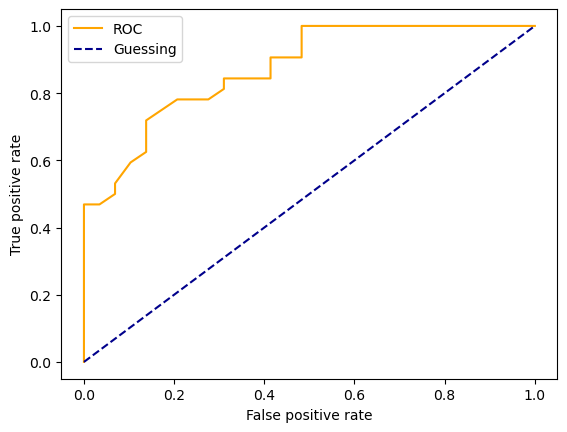

In [179]:
import matplotlib.pyplot as plt
def plotcurve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.legend()


plotcurve(fpr,tpr)

In [182]:
from sklearn.metrics import roc_auc_score
rocscore=roc_auc_score(ytest,ypos)
rocscore

np.float64(0.8733836206896552)

## Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual label it predicts,giving an idea where the model is getting confused

In [58]:
np.random.seed(42)
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

clf=RandomForestClassifier()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
clf.fit(Xtrain,ytrain)
ypreds=clf.predict(Xtest)

In [33]:
##visualise with crosstab
pd.crosstab(ytest,ypreds,rownames=["Actual Labels"],colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,4,28


In [194]:
## 5 is when false positive # 4 is false negative

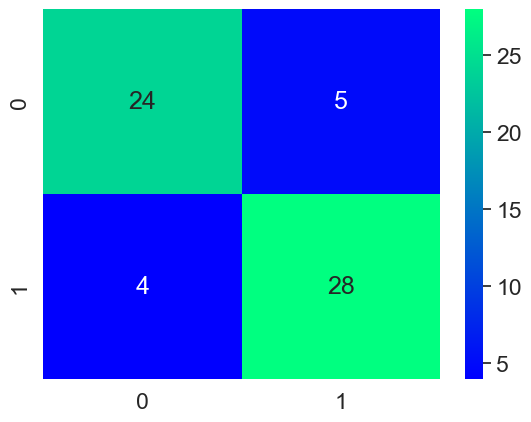

In [68]:
## visualising the matrix with seaborn
import seaborn as sns
sns.set(font_scale=1.5)
cf=confusion_matrix(ytest,ypreds)
sns.heatmap(cf,annot=True,cmap="winter")
plt.show()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


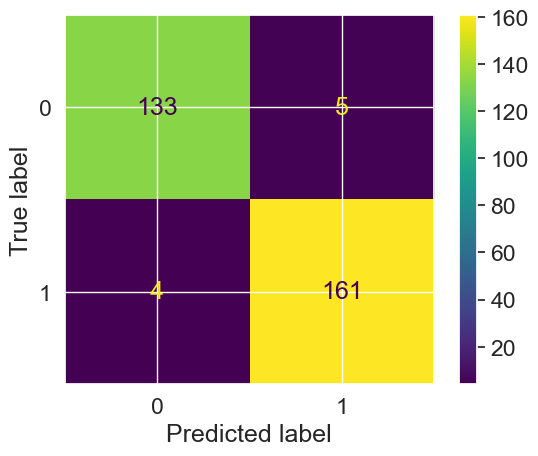

In [63]:
import sklearn
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X,y=y)
plt.show()

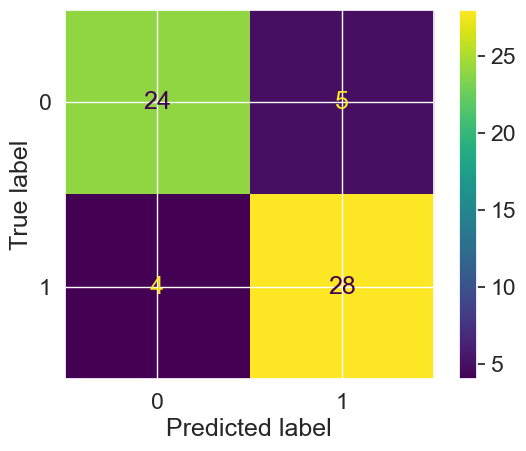

In [64]:
ConfusionMatrixDisplay.from_predictions(ytest,ypreds)

## Classification Report
collection of evaluation metrices

In [71]:
from sklearn.metrics import classification_report
classification_report(ytest,ypreds,output_dict=True)

{'0': {'precision': 0.8571428571428571,
  'recall': 0.8275862068965517,
  'f1-score': 0.8421052631578947,
  'support': 29.0},
 '1': {'precision': 0.8484848484848485,
  'recall': 0.875,
  'f1-score': 0.8615384615384616,
  'support': 32.0},
 'accuracy': 0.8524590163934426,
 'macro avg': {'precision': 0.8528138528138528,
  'recall': 0.8512931034482758,
  'f1-score': 0.8518218623481781,
  'support': 61.0},
 'weighted avg': {'precision': 0.8526009509616066,
  'recall': 0.8524590163934426,
  'f1-score': 0.8522997278821265,
  'support': 61.0}}

## The params
<img src="Screenshot 2025-07-04 194124.png" />

<img src="Screenshot 2025-07-04 195518.png" />

<img src="Screenshot 2025-07-04 195544.png"/>

## Evaluation of Regression Model
* R^2 coefficient of determination
* Mean absolute error
* Mean squared error

In [76]:
##“How much better is my model than just guessing the average?”
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
model=RandomForestRegressor()
X=hf.drop("target",axis=1)
y=hf["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

0.806652667101436

In [81]:
from sklearn.metrics import r2_score
ytestmean=np.full(len(ytest),np.mean(ytest))
ytestmean[:5]
r2_score(ytest,ytestmean)

0.0

* R² = 1 → Perfect model

* R² = 0 → Model is no better than predicting the mean

* R² < 0 → Model is worse than just predicting the mean

## MAE
* MAE IS THE MEAN OF THE ABSOLUTE DIFFERENCE BETWEEN THE PREDICTED VALUES AND THE ACTUAL VALUES
* It gives an idea about how wrong the predictions are

In [83]:
from sklearn.metrics import mean_absolute_error
ypreds=model.predict(Xtest)
mean_absolute_error(ytest,ypreds)

0.32656738464147306

In [84]:
## This means that, on average, the model's predictions are off by ~0.33 units compared to the actual values in the test set.

In [86]:
df=pd.DataFrame({"actual values":ytest,"predicted values":ypreds})
df["difference"]=df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,difference
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.660220,0.073220
7113,1.98200,2.343100,0.361100
7668,1.57500,1.663110,0.088110
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [87]:
df["difference"].mean()

np.float64(0.0120639253875965)

In [89]:
np.abs(df["difference"]).mean()

np.float64(0.32656738464147306)

## MSE Mean squared error
* MSE IS THE MEAN OF THE SQUARE OF THE DIFFERENCE BETWEEN THE PREDICTED VALUES AND THE ACTUAL VALUES

In [90]:
df["differrences squared"]=np.square(df["difference"])

In [91]:
df.head

,actual values,predicted values,difference,differrences squared
20046,0.47700,0.493900,0.016900,0.000286
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540240,0.354240,0.125486
9814,2.78000,2.331760,-0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.219830,-0.413170,0.170709
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [93]:
np.mean(df["differrences squared"])

np.float64(0.25336408094921037)

In [95]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,ypreds)

0.25336408094921037

Machine Learning Model Evaluation
Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)

## Finally using the scoring method

In [147]:
np.random.seed(42)
from sklearn.model_selection import cross_val_score
clf=RandomForestClassifier()
X=hd.drop("target",axis=1)
y=hd["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
clf.fit(Xtrain,ytrain)
crossacc=cross_val_score(clf,X,y,cv=5)##gives accuracy
crossacc.mean()

np.float64(0.811639344262295)

In [139]:
crossprec=cross_val_score(clf,X,y,cv=5,scoring="precision")

In [109]:
print(f"the cross validated precision is {crossprec.mean():.2f}")

the cross validated precision is 0.83


In [148]:
## recall
crossrecall=cross_val_score(clf,X,y,cv=5,scoring="recall")
print(crossrecall.mean())

0.8424242424242424


In [155]:
## Regression Model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
X=hf.drop("target",axis=1)
y=hf["target"]
model=RandomForestRegressor()

print("Done")

Done


In [154]:
np.random.seed(42)
print("before")
crossr2=cross_val_score(model,X,y,cv=3,scoring=None)
print(crossr2.mean())

before
0.6545660727379677


In [160]:
## mean absolute error
crossmae=cross_val_score(model,X,y,cv=3,scoring="neg_mean_absolute_error")
np.mean(crossmae)
crossmae

array([-0.51686102, -0.42360887, -0.50431451])

In [162]:
## mean absolute error
crossmse=cross_val_score(model,X,y,cv=3,scoring="neg_mean_squared_error")
np.mean(crossmse)
crossmse

array([-0.50739024, -0.33135247, -0.553653  ])

In [187]:
np.random.seed(42)
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.model_selection import train_test_split
X=hd.drop("target",axis=1)
y=hd["target"]
clf=RandomForestClassifier()

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
clf.fit(Xtrain,ytrain)
ypreds=clf.predict(Xtest)

acc=accuracy_score(ytest,ypreds)
rec=recall_score(ytest,ypreds)

print(f"acc:{acc*100:.2f}%")
print(f"rec:{rec}")
print(f"f1:{f1_score(ytest,ypreds)}")
print(f"precision:{precision_score(ytest,ypreds)}")

acc:85.25%
rec:0.875
f1:0.8615384615384616
precision:0.8484848484848485


In [188]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
np.random.seed(42)
model=RandomForestRegressor()
X=hf.drop("target",axis=1)
y=hf["target"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
model.fit(Xtrain,ytrain)
ypreds=model.predict(Xtest)
print(f"r2:{r2_score(ytest,ypreds)}")
print(f"mae:{mean_absolute_error(ytest,ypreds)}")
print(f"mse:{mean_squared_error(ytest,ypreds)}")


r2:0.806652667101436
mae:0.32656738464147306
mse:0.25336408094921037


## 5. Improving model predictions through experimentation (hyperparameter tuning)

The first predictions you make with a model are generally referred to as baseline predictions.

It's similar for the first evaluation metrics you get. These are generally referred to as baseline metrics.

Your next goal is to improve upon these baseline metrics.

How?

Experiment, experiment, experiment!

Two of the main methods to improve baseline metrics are:

1. From a data perspective.
2. From a model perspective.

From a data perspective asks:

* Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
* Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning data into numbers) strategy.


From a model perspective asks:

* Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)
  
* Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?
Note: Patterns in data are also often referred to as data parameters. The difference between parameters and hyperparameters is a machine learning model seeks to find parameters in data on its own, where as, hyperparameters are settings on a model which a person (you) can adjust.

Since we have two existing datasets, we'll look at improving our results from a model perspective.

More specifically, we'll look at how we could improve our RandomForestClassifier and RandomForestRegressor models through hyperparameter tuning.

What even are hyperparameters?

Good question, let's check them out.

First, we'll instantiate a RandomForestClassifier.

In [190]:
clf=RandomForestClassifier()

When we instantiate a model like above, we're using the default hyperparameters.

These get printed out when you call the model instance and get_params().

In [191]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

You'll see things like max_depth, min_samples_split, n_estimators.

Each of these is a hyperparameter of the RandomForestClassifier you can adjust.

You can think of hyperparameters as being similar to dials on an oven.

On the default setting your oven might do an okay job cooking your favourite meal. But with a little experimentation, you find it does better when you adjust the settings.


The same goes for imporving a machine learning model by hyperparameter tuning.

The default hyperparameters on a machine learning model may find patterns in data well. But there's a chance a adjusting the hyperparameters may improve a models performance.

Every machine learning model will have different hyperparameters you can tune.

You might be thinking, "how the hell do I remember all of these?"

Another good question.

It's why we're focused on the Random Forest.

Instead of memorizing all of the hyperparameters for every model, we'll see how it's done with one.

And then knowing these principles, you can apply them to a different model if needed.

Reading the Scikit-Learn documentation for the Random Forest, you'll find they suggest trying to change n_estimators (the number of trees in the forest) and min_samples_split (the minimum number of samples required to split an internal node).

We'll try tuning these as well as:

* max_features (the number of features to consider when looking for the best split)
* nmax_depth (the maximum depth of the tree)
* min_samples_leaf (the minimum number of samples required to be at a leaf node)
If this still sounds like a lot, the good news is, the process we're taking with the Random Forest and tuning its hyperparameters, can be used for other machine learning models in Scikit-Learn. The only difference is, with a different model, the hyperparameters you tune will be different.

Adjusting hyperparameters is usually an experimental process to figure out which are best. As there's no real way of knowing which hyperparameters will be best when starting out.

To get familar with hyparameter tuning, we'll take our RandomForestClassifier and adjust its hyperparameters in 3 ways.

1. By hand
2. Randomly with sklearn.model_selection.RandomizedSearchCV
3. Exhaustively with sklearn.model_selection.GridSearchCV

In [192]:
## Tuning By Hand

In [193]:
def evaluate_preds(y_true: np.array, 
                   y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [194]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Set the seed
np.random.seed(42)

# Read in the data
# heart_disease = pd.read_csv("../data/heart-disease.csv") # load in from local directory


# Split into X (features) & y (labels)
X = hd.drop("target", axis=1)
y = hd["target"]

# Training and test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create validation and test split by spliting testing data in half (30% test -> 15% validation, 15% test)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.78
Recall: 0.88
F1 score: 0.82


{'accuracy': 0.8, 'precision': 0.78, 'recall': 0.88, 'f1': 0.82}

In [195]:
np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 77.78%
Precision: 0.77
Recall: 0.83
F1 score: 0.80


# 5.2 Hyperparameter tuning with RandomizedSearchCV

In [216]:
from sklearn.model_selection import RandomizedSearchCV
grid={"n_estimators":[10,100,200,500,1000,12000],"max_depth":[None,5,10,20,30],"max_features":["log2","sqrt"],"min_samples_split":[2,4,6],"min_samples_leaf":[1,2,4]}

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)
rs_clf=RandomizedSearchCV(estimator=clf,param_distributions=grid,n_iter=10,cv=5,verbose=2)
rs_clf.fit(X_train,y_train)

In [203]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 4,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 10}

In [204]:
## making predictions with the best parameters,takes the best as default parameters
y_preds=rs_clf.predict(X_test)
evaluate_preds(y_test,y_preds)

Acc: 85.25%
Precision: 0.85
Recall: 0.88
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.85, 'recall': 0.88, 'f1': 0.86}

## 5.3 Hyperparameter tuning with GridSearchCV

In [226]:
## grid search cv tries all possible combinations hence doesnt need niter
from sklearn.model_selection import GridSearchCV
grid2={"n_estimators":[100,200,500],"max_depth":[None],"max_features":["log2","sqrt"],"min_samples_split":[6],"min_samples_leaf":[1,2]}
X = hd.drop("target", axis=1)
y = hd["target"]
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = RandomForestClassifier(n_jobs=1)
gs_clf=GridSearchCV(estimator=clf,param_grid=grid2,cv=5,verbose=2)
gs_clf.fit(X_train,y_train)

In [222]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [227]:
ytest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [228]:
y_preds=gs_clf.predict(X_test)
y_preds

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [211]:
evaluate_preds(y_test,y_preds)

Acc: 85.25%
Precision: 0.87
Recall: 0.84
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.87, 'recall': 0.84, 'f1': 0.86}

## Saving and loading machine learning models

Two ways to do so
* picke module
* joblib module


In [224]:
##using pickle
import pickle
pickle.dump(gs_clf,open("randomforestmodel1.pkl","wb"))

In [233]:
## load a saved model
loaded_model=pickle.load(open("randomforestmodel1.pkl","rb"))
loaded_preds=loaded_model.predict(X_test)
loaded_preds
evaluate_preds(y_test,loaded_preds)

Acc: 85.25%
Precision: 0.87
Recall: 0.84
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.87, 'recall': 0.84, 'f1': 0.86}

In [235]:
## using joblib
from joblib import dump,load
dump(gs_clf,filename="randomforestmodel1.joblib")

['randomforestmodel1.joblib']

In [236]:
joblibmodel=load("randomforestmodel1.joblib")

In [237]:
ypreds=joblibmodel.predict(X_test)
evaluate_preds(y_test,ypreds)

Acc: 85.25%
Precision: 0.87
Recall: 0.84
F1 score: 0.86


{'accuracy': 0.85, 'precision': 0.87, 'recall': 0.84, 'f1': 0.86}

## Putting it all together

In [245]:
##importing the data
data=pd.read_csv("car-sales-extended-missing-data.csv")
data


,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [254]:
# 1. fill the missing data
# 2. make the data numerical
# 3. build a machine learning model on it

## preprocessing-:
# 1. fill the missing data
# 2. make the data numerical

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
## modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

np.random.seed(42)
data=pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset="Price",inplace=True)
cat_features=["Make","Colour"]
cat_transformer=Pipeline(steps=[("imputer",SimpleImputer(fill_value="missing",strategy="constant")),("onehot",OneHotEncoder(sparse_output=False,handle_unknown="ignore"))])
door_feature=["Doors"]
door_transformer=Pipeline(steps=[("imputer",SimpleImputer(fill_value=4,strategy="constant"))])
numeric_feature=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])
preprocessor=ColumnTransformer(transformers=[("cat",cat_transformer,cat_features),("door",door_transformer,door_feature),("num",numeric_transformer,numeric_feature)])
model=Pipeline(steps=[("preprocessor",preprocessor),("model",RandomForestRegressor())])
X=data.drop("Price",axis=1)
y=data["Price"]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
model.fit(Xtrain,ytrain)
model.score(Xtest,ytest)

## Imputer fills the missing values
## column transformer applies those values
## one hot encoder converts cols into numbers

0.22188417408787875

| Step                        | What's Happening                                                                |
| --------------------------- | ------------------------------------------------------------------------------- |
| `SimpleImputer`             | Fills missing values (mean for numbers, `"missing"` or `4` for categories)      |
| `OneHotEncoder`             | Converts categories like `"Red"` or `"Blue"` into 1s and 0s                     |
| `ColumnTransformer`         | Applies different transformations to different columns at once                  |
| `Pipeline`                  | Chains everything together — preprocessing + model — into one object            |
| `model.fit(Xtrain, ytrain)` | First applies `preprocessor.fit_transform()` on `Xtrain`, then trains the model |
| `model.predict(Xtest)`      | Applies `preprocessor.transform()` to `Xtest`, then predicts with the model     |
| `model.score(...)`          | Evaluates accuracy (R² score in regression) on test data                        |


| Concept                 | Summary                                                |
| ----------------------- | ------------------------------------------------------ |
| `SimpleImputer`         | Used to fill in missing values                         |
| `OneHotEncoder`         | Turns text into numerical dummy variables              |
| `ColumnTransformer`     | Applies transformers to correct columns                |
| `Pipeline`              | Chains preprocessing and model together cleanly        |
| `fit()` in pipeline     | Applies `preprocessor.fit_transform()` + model fitting |
| `predict()` in pipeline | Applies `preprocessor.transform()` + prediction        |


preprocessor.fit_transform()->apply transformations


In [271]:
#use gridsearch cv or randomise search cv with our pipeline
pipegrid={
    "preprocessor__num__imputer__strategy":["mean","median"],
    "model__n_estimators":[100,200,500],
    "model__max_depth":[None,5],
    # "model__max_features":["sqrt"],
    # "model__min_samples_split":[2,4]
    
}

gsmodel=GridSearchCV(model,pipegrid,cv=5,verbose=2)
gsmodel.fit(Xtrain,ytrain)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=None, model__n_estimators=100, preprocessor__num__imputer__strategy=median; 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__n_estimators': [100, 200, 500],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [273]:
gsmodel.best_params_

{'model__max_depth': 5,
 'model__n_estimators': 200,
 'preprocessor__num__imputer__strategy': 'median'}

In [272]:
gsmodel.score(Xtest,ytest)

0.3337788084543186

# Final Summary of Workflow


---

###  **Scikit-Learn ML Workflow Summary**

1. **Import & Load Data**

   * Use `pandas` to load and inspect the dataset.

2. **Explore & Prepare Data**

   * Check missing values, data types, and distributions.

3. **Split Features and Labels**

   * `X = df.drop("target", axis=1)`
   * `y = df["target"]`

4. **Train-Test Split**

   * `train_test_split(X, y, test_size=0.2, random_state=42)`

5. **Preprocessing Pipeline**

   * Use `ColumnTransformer` to:

     * Scale numeric features
     * One-hot encode categorical features

6. **Build Full Pipeline**

   * Combine preprocessor with a model using `Pipeline`

7. **Train Model**

   * `model.fit(X_train, y_train)`

8. **Evaluate Model**

   * Use metrics: `accuracy`, `precision`, `recall`, `f1`, `confusion_matrix`

9. **Improve Model**

   * Try other algorithms
   * Use `GridSearchCV` or `RandomizedSearchCV`

10. **Save and Load Model**

* `joblib.dump(model, "model.pkl")` and `joblib.load("model.pkl")`

11. **Predict on New Data**

* `model.predict(new_data)`

---

